<a href="https://colab.research.google.com/github/tayfununal/Artificial-Neural-Network-with-One-Hidden-Layer/blob/main/new_revision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install playground-data

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for playground-data: filename=playground_data-1.1.1-py2.py3-none-any.whl size=20796 sha256=da3e11edac6595a4c7f6630c45df977d07706edf3a1fd738782fbf8234b600c8
  Stored in directory: /root/.cache/pip/wheels/0a/83/26/9701478cd2f31df42fcc7d2cf0fa3fd6ff23cf8e44346166f3
Successfully built playground-data


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plygdata as pg
import json
import requests

In [4]:
pg.dataset.random.seed(8)
Datas = pg.dataset.DataGenerator.classify_xor(1000,noise=0.1)

In [5]:
def initialization_parameters(x, y, num_node, random_seeds_one, random_seeds_two):
    np.random.seed(random_seeds_one)
    W1 = np.random.randn(num_node * x.shape[0]).reshape(num_node, x.shape[0])
    b1 = np.zeros((num_node, 1))

    np.random.seed(random_seeds_two)
    W2 = np.random.randn(y.shape[0], num_node)
    b2 = np.zeros((y.shape[0], 1))

    assert W1.shape == (num_node, x.shape[0])
    assert b1.shape == (num_node, 1)

    assert W2.shape == (y.shape[0], num_node)
    assert b2.shape == (y.shape[0], 1)

    parameters = {'W1': W1,
                  'b1': b1,
                  'W2': W2,
                  'b2': b2}
    return parameters

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def relu(x):
    return np.maximum(0, x)


def reluDerivative(x):
    x[x <= 0] = 0
    x[x > 0] = 1
    return x


def forward_prop(x, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = np.dot(W1, x) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    assert (A2.shape == (1, x.shape[1]))
    cache = {
        'Z1': Z1,
        'A1': A1,
        'Z2': Z2,
        'A2': A2
    }
    return A2, cache


def backward_prop(x, y, parameters, baski_neuron, cache, learning_rate=0.1):
    m = y.shape[1]

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    A1 = cache['A1']
    A2 = cache['A2']

    # Calculations of backward propagation: dW1, db1, dW2, db2
    baski_W1 = np.zeros((baski_neuron, 2))
    baski_W1[baski_neuron - 1, 0] = gama * W1[baski_neuron - 1, 0]
    baski_W1[baski_neuron - 1, 1] = gama * W1[baski_neuron - 1, 1]

    baski_W2 = np.zeros((1, baski_neuron))
    baski_W2[0, baski_neuron - 1] = gama * W2[0, baski_neuron - 1]

    baski_b1 = np.zeros((baski_neuron, 1))
    baski_b1[baski_neuron - 1, 0] = gama * b1[baski_neuron - 1, 0]

    dZ2 = A2 - Y
    dW2 = (1.0 / m) * (np.dot(dZ2, A1.T) + baski_W2)
    db2 = (1.0 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), reluDerivative(A1))
    dW1 = (1.0 / m) * (np.dot(dZ1, X.T) + baski_W1)
    db1 = (1.0 / m) * (np.sum(dZ1, axis=1, keepdims=True) + baski_b1)

    # Updating parameters
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parameters = {'W1': W1,
                  'b1': b1,
                  'W2': W2,
                  'b2': b2}
    return parameters


def cross_entropy_cost(y, A2, baski_neuron):
    m = y.shape[1]

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']

    cross_entropy = np.multiply(np.log(A2 + 1e-15), Y) + np.multiply((1 - Y), np.log(1 - A2 + 1e-15))
    cost = (1.0 / m) * (- np.sum(cross_entropy) + (gama / 2.0) * (
                W1[baski_neuron - 1, 0] ** 2 + W1[baski_neuron - 1, 1] ** 2 + W2[0, baski_neuron - 1] ** 2 + b1[
            baski_neuron - 1, 0] ** 2))

    # Squeezing to avoid unnecessary dimensions
    cost = np.squeeze(cost)
    return cost

In [6]:
def nn_model(x, y, parameters, baski_neuron, number_of_iter=1000):
    A2, cache = forward_prop(x, parameters)
    cost = cross_entropy_cost(y, A2, baski_neuron)
    cost_history = []
    cost_history.append(cost)
    for i in range(1, number_of_iter):
        parameters = backward_prop(x, y, parameters, baski_neuron, cache, learning_rate=0.6)
        A2, cache = forward_prop(x, parameters)
        cost = cross_entropy_cost(y, A2, baski_neuron)
        cost_history.append(cost)
    return cost, parameters, cost_history

In [7]:
df = pd.DataFrame(Datas)
df = df.sample(frac=1,random_state=1).reset_index(drop=True)
df.loc[df.loc[:,2] ==-1,2]=0 #change the label which is 0 to -1
# pd.set_option('display.max_rows', df.shape[0] + 1) ---> showing all row

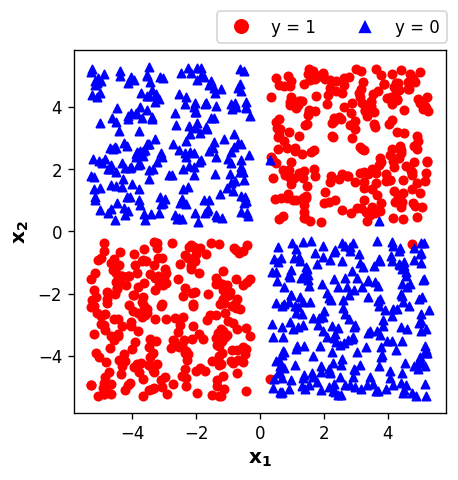

In [8]:
df1 = df[df[2] == 1]
df2 = df[df[2] == 0]

fig, ax = plt.subplots(figsize=(4,4), dpi=120)
df1.plot.scatter(0 ,1 , s=25, c="red", ax=ax)
df2.plot.scatter(0, 1, s=25, c="blue", ax=ax, marker="^")

red_circle = plt.Line2D([0], [0], marker='o', color='w', label='y = 1',markerfacecolor='r', markersize=10)
blue_circle = plt.Line2D([0], [0], marker='^', color='w', label='y = 0',markerfacecolor='b', markersize=10)
ax.legend(handles=[red_circle,blue_circle], bbox_to_anchor=(1.025, 1.13), ncol=2)

plt.xlabel("$\mathbf{x_1}$", fontsize=12, fontweight="bold")
plt.ylabel("$\mathbf{x_2}$", fontsize=12, fontweight="bold")
plt.show()

In [9]:
X = np.array(df[[0,1]]).T
Y = np.array(df[[2]]).T

In [10]:
np.random.seed(65468)

In [11]:
gama = 12

sonuc_parameters=[]
sonuc_cost=[]
for i in range(2,22):
  number_of_neuron = i
  parameters = initialization_parameters(X, Y, number_of_neuron, int(1), int(1))
  print(parameters)
  cost, parameters, cost_history = nn_model(X, Y, parameters, baski_neuron=number_of_neuron, number_of_iter=1000)
  sonuc_cost.append(cost)
  sonuc_parameters.append(parameters)

{'W1': array([[ 1.62434536, -0.61175641],
       [-0.52817175, -1.07296862]]), 'b1': array([[0.],
       [0.]]), 'W2': array([[ 1.62434536, -0.61175641]]), 'b2': array([[0.]])}
{'W1': array([[ 1.62434536, -0.61175641],
       [-0.52817175, -1.07296862],
       [ 0.86540763, -2.3015387 ]]), 'b1': array([[0.],
       [0.],
       [0.]]), 'W2': array([[ 1.62434536, -0.61175641, -0.52817175]]), 'b2': array([[0.]])}
{'W1': array([[ 1.62434536, -0.61175641],
       [-0.52817175, -1.07296862],
       [ 0.86540763, -2.3015387 ],
       [ 1.74481176, -0.7612069 ]]), 'b1': array([[0.],
       [0.],
       [0.],
       [0.]]), 'W2': array([[ 1.62434536, -0.61175641, -0.52817175, -1.07296862]]), 'b2': array([[0.]])}
{'W1': array([[ 1.62434536, -0.61175641],
       [-0.52817175, -1.07296862],
       [ 0.86540763, -2.3015387 ],
       [ 1.74481176, -0.7612069 ],
       [ 0.3190391 , -0.24937038]]), 'b1': array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]]), 'W2': array([[ 1.62434536, -0

In [12]:
sonuc_cost

[0.40100405494066227,
 0.08901168630308062,
 0.04659696205203993,
 0.023210300787474603,
 0.08796505840367394,
 0.035753217152925613,
 0.0315504030628196,
 0.018296973167755755,
 0.020212350617785594,
 0.040782741362820306,
 0.04479828669462147,
 0.02114124347448542,
 0.019064541215755855,
 0.02256055894150967,
 0.02384974026100508,
 0.019966495231253246,
 0.020055375089647845,
 0.020463097436972305,
 0.0344971047102056,
 0.024652759580698253]

In [13]:
sonuc_parameters

[{'W1': array([[ 1.47931845,  0.55345587],
         [ 1.49526282, -0.44416708]]),
  'W2': array([[ 2.02049783, -1.710385  ]]),
  'b1': array([[-1.44240986],
         [-0.70166067]]),
  'b2': array([[0.16239959]])},
 {'W1': array([[ 2.02732655,  0.55377855],
         [-0.56614457, -2.11062132],
         [ 1.51202118, -1.58889934]]),
  'W2': array([[ 2.01683686,  2.023043  , -2.20810908]]),
  'b1': array([[ 0.19203628],
         [ 0.24147055],
         [-0.25483759]]),
  'b2': array([[-3.80045959]])},
 {'W1': array([[ 3.18865384e+00,  4.76038389e-01],
         [-5.00284864e-01, -3.21696353e+00],
         [ 2.76020085e+00, -2.75403669e+00],
         [ 3.22643490e-03, -2.58645582e-03]]),
  'W2': array([[ 3.14663125,  3.17167007, -3.29969295, -0.00408427]]),
  'b1': array([[-0.23803261],
         [ 0.01964307],
         [-0.53904735],
         [-0.00092728]]),
  'b2': array([[-4.50263747]])},
 {'W1': array([[ 3.28077340e+00,  4.87981646e-01],
         [-4.93251432e-01, -3.18552093e+00],
   

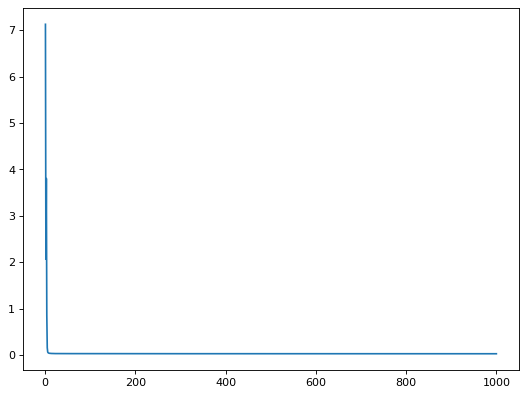

In [14]:
x = np.arange(1,1001)
plt.figure(figsize=(8,6), dpi=80)
plt.plot(x, cost_history)

In [23]:
parameters = sonuc_parameters[3]
parameters


{'W1': array([[ 3.28077340e+00,  4.87981646e-01],
        [-4.93251432e-01, -3.18552093e+00],
        [ 1.76940415e+00, -1.96160578e+00],
        [ 2.33154514e+00, -1.95208833e+00],
        [-3.87745648e-04, -2.55712402e-03]]),
 'W2': array([[ 3.21643777e+00,  3.13484008e+00, -1.76527028e+00,
         -2.79615614e+00,  2.59806992e-03]]),
 'b1': array([[-3.30114593e-01],
        [ 4.78218257e-02],
        [-2.89384887e-01],
        [-5.92360980e-01],
        [ 7.18271559e-05]]),
 'b2': array([[-4.51036124]])}

In [16]:
cost_history[-1]

0.024652759580698253

In [17]:
cost

0.024652759580698253

In [24]:
pg.dataset.random.seed(9)
Datas = pg.dataset.DataGenerator.classify_xor(1000,noise=0.1)
df = pd.DataFrame(Datas)
df = df.sample(frac=1,random_state=1).reset_index(drop=True)
df.loc[df.loc[:,2] ==-1,2]=0 #change the label which is 0 to -1
# pd.set_option('display.max_rows', df.shape[0] + 1) ---> showing all row
df1 = df[df[2] == 1]
df2 = df[df[2] == 0]

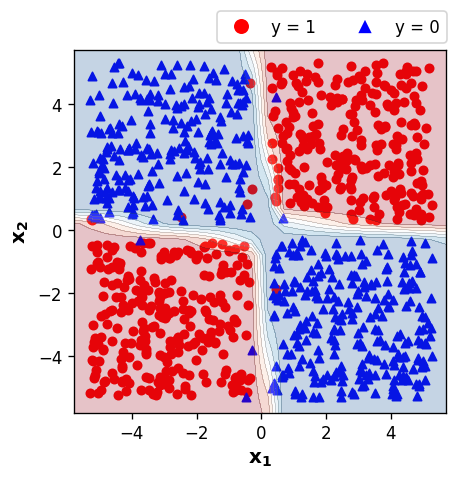

In [25]:
from matplotlib.lines import Line2D
def plot_decision_boundary(X, Y, cmap='RdBu_r'):

  h = 0.5
  x_min, x_max = X[0,:].min() - h, X[0,:].max() + h
  y_min, y_max = X[1,:].min() - h, X[1,:].max() + h
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
  A2, cache = forward_prop(np.c_[xx.ravel(), yy.ravel()].T, parameters)
  A2 = A2.reshape(xx.shape)

  fig, ax = plt.subplots(figsize=(4,4), dpi=120)
  
  df1.plot.scatter(0 ,1 , s=25, c="red", cmap=cmap, ax=ax)
  df2.plot.scatter(0, 1, s=25, c="blue", ax=ax, marker="^", cmap=cmap)

  ax.contourf(xx, yy, A2, cmap=cmap, alpha=0.25)
  ax.contour(xx, yy, A2, colors='k', linewidths=0.1)

  red_circle = Line2D([0], [0], marker='o', color='w', label='y = 1',markerfacecolor='r', markersize=10)
  blue_circle = Line2D([0], [0], marker='^', color='w', label='y = 0',markerfacecolor='b', markersize=10)
  ax.legend(handles=[red_circle,blue_circle], bbox_to_anchor=(1.025, 1.13), ncol=2)
  
  plt.xlabel("$\mathbf{x_1}$", fontsize=12, fontweight="bold")
  plt.ylabel("$\mathbf{x_2}$", fontsize=12, fontweight="bold")

plot_decision_boundary(X, Y)

In [19]:
np.round(sonuc_cost,6)

array([0.401004, 0.089012, 0.046597, 0.02321 , 0.087965, 0.035753,
       0.03155 , 0.018297, 0.020212, 0.040783, 0.044798, 0.021141,
       0.019065, 0.022561, 0.02385 , 0.019966, 0.020055, 0.020463,
       0.034497, 0.024653])